# Preparazione di un dataset - E2E

In questa lezione analizzeremo un dataset e lo prepareremo per i successivi passaggi di modellazione.

## 1 - Import e descrizione

Per prima cosa importiamo il nostro dataset riguardante le crisi economiche nei paesi africani, `african_crises.csv`, in un dataframe pandas e cerchiamo di comprendere meglio la natura delle varie feature incluse.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./datasets/banking_fraud.csv") # Importiamo il dataset
df.head(5) # Visualizziamo le prime 5 colonne

,customer_age,proposed_credit_limit,date_of_birth_distinct_emails_4w,name_email_similarity,foreign_request,velocity_6h,has_other_cards,credit_risk_score,intended_balcon_amount,keep_alive_session,fraud_bool,income,payment_type
0,60,1000.0,2.0,0.723006,0,5245.906129,0.0,216.0,-0.749444,0.0,0,4500.0,AD
1,20,1000.0,17.0,0.439387,0,4266.736798,0.0,187.0,-0.491718,1.0,0,4000.0,AD
2,30,200.0,15.0,0.908711,0,4151.220841,1.0,136.0,49.283734,0.0,0,4500.0,AA
3,40,200.0,4.0,0.115561,0,3467.555723,0.0,286.0,-0.981245,0.0,0,4500.0,AD
4,20,200.0,7.0,0.770530,0,1486.553088,0.0,82.0,-0.690537,1.0,0,2000.0,AB


Possiamo già intuire i tipi delle colonne. Notiamo inoltre che il dataset ha alcuni valori mancanti (ad esempio il valore di `exch_usd` alla riga 3). Per avere una visione più completa possiamo applicare alcune funzioni, che per comodità abbiamo raccolto in un'unica funzione `df_info`, in modo da poterle applicare più comodamente durante l'analisi:

In [2]:
def get_info(dataframe):
    """
    Restituisce alcune informazioni di sintesi riguardo al dataset.
    """
    display(
        # concateniamo l'output delle seguenti funzioni lungo l'asse 1, quindi affianchiamo le colonne
        pd.concat(                                              
            [
                # df.dtypes restituisce il tipo di ciascuna colonna del dataframe
                dataframe.dtypes.rename("dtypes"),        
                # df.nunique() restituisce il numero di valori distinti in ciascuna colonna
                dataframe.nunique().rename("n_unique"),  
                # df.isna() restituisce una maschera con valore True quando il valore corrispondente è NaN, 
                # sum() conta il numero di valori True
                dataframe.isna().sum().rename("nan_vals"),      
                # df.describe() restituisce alcune statistiche riguardo alle colonne
                dataframe.describe().transpose()                
            ], 
            axis=1
        )
    )

Applichiamo ora la nostra nuova funzione al dataframe:

In [3]:
get_info(df)

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,int64,9,0,61029.0,34.954694,12.498410,10.000000,30.000000,30.000000,40.000000,90.000000
proposed_credit_limit,float64,12,610,60419.0,570.476671,531.690447,190.000000,200.000000,200.000000,1000.000000,2100.000000
date_of_birth_distinct_emails_4w,float64,38,610,60419.0,9.144094,5.066282,0.000000,5.000000,8.000000,12.000000,37.000000
name_email_similarity,float64,60416,610,60419.0,0.474869,0.292672,0.000132,0.200570,0.466318,0.742125,0.999998
foreign_request,int64,2,0,61029.0,0.028888,0.167493,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,60416,610,60419.0,5597.678617,3015.414699,-89.613654,3344.632299,5249.907452,7640.570715,16535.402652
has_other_cards,float64,2,610,60419.0,0.199292,0.399471,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,504,610,60419.0,138.814231,74.051526,-155.000000,86.000000,128.000000,189.000000,385.000000
intended_balcon_amount,float64,60401,610,60419.0,7.966360,19.828127,-15.167388,-1.184833,-0.844030,-0.241533,111.566004
keep_alive_session,float64,2,610,60419.0,0.532664,0.498936,0.000000,0.000000,1.000000,1.000000,1.000000


Notiamo alcune cose:

- Le colonne `cc3`, `country` e `banking_crisis` sono di tipo `object`: dovremo trasformarle in valori numerici per favorire la modellizzazione
- Le colonne `systemic_crisis`, `domestic_debt_in_default`, `sovereign_external_debt_default`, `independence`, `currency_crises`, `inflation_crises` sono categoriche
- Le colonne `exch_usd` e `inflation_annual_cpi` hanno valori mancanti: risolveremo questo problema tramite imputazione.
  
Concentriamoci ora sulle colonne di tipo `object`:

In [4]:
for column in df.select_dtypes(exclude=[int, float]):   # Cicliamo fra le colonne ti tipo `object`
    print(column, ":")                                  # Stampiamo il nome della colonna, 
    print(df[column].unique())                          # l'elenco dei valori unici e
    print("*","-"*80,"*")                               # un separatore per chiarezza

payment_type :
['AD' 'AA' 'AB' 'AC' nan 'AE']
* -------------------------------------------------------------------------------- *


- Le colonne `cc3` e `country` sono ridondanti: rappresentano entrambe il paese a cui fa riferimento la riga,
- la colonna `banking_crisis` è categorica: trasformiamola in una variabile numerica.

## Trasformare una variabile `object` in una variabile numerica
### Approccio 1: il metodo `where`

Per trasformare una variabile `object` binaria in una numerica possiamo sfruttare il metodo `where` messo a disposizione dalla libreria numpy:

In [5]:
# Sintassi: where(condition, x, y) se `condition` allora `x` altrimenti `y` 
result_1 = np.where(df["payment_type"] == "AA", 1, 0) 
display(result_1)

array([0, 0, 1, ..., 0, 0, 1])

### Approccio 2: la classe `OneHotEncoder`

In questo caso utilizziamo una classe dalla libreria `scikit-learn`:

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(                                            
    # Istanziamo un oggetto di classe OneHotEncoder
    handle_unknown="ignore",                                        
    # Transformando un altro dataset (ad esempio un test set, o nuovi dati) 
    # ignoreremo le classi non presenti nel train set
    drop=None,                                                  
    # Con drop='first' l'encoder produrrà n-1 colonne per n classi
    sparse_output= False,                                           
    # A scopo di visualizzazione
    dtype = int
)

encoder.fit(
    df["payment_type"]                                    
    # Fittiamo la trasformazione sul nostro dataset
    .to_numpy()
    .reshape(-1,1)
)          

result_2 = (
    encoder.transform(
        df["payment_type"]                     
        # Applichiamo la trasformazione sul nostro dataset
       .to_numpy()
       .reshape(-1,1)
    )
)

display(encoder.categories_, result_2)                                
# Mostriamo la categorie trovate e i risultati dell'encoding
# I risultati sono opposti a quelli dell'approccio 1 poiché 
# corrispondono alla seconda categoria, `no_crisis`

[array(['AA', 'AB', 'AC', 'AD', 'AE', nan], dtype=object)]

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

Il secondo metodo risulta più complicato ma ha un grande vantaggio: è applicabile a features con un qualsiasi numero di categorie senza modifiche.
Riassegnamo ora la colonna con i valori binari ottenuti:

In [7]:
ohe_df = pd.DataFrame(result_2, columns=encoder.categories_[0])
ohe_df.head(2)

,AA,AB,AC,AD,AE,NaN
0,0,0,0,1,0,0
1,0,0,0,1,0,0


In [8]:
ohe_df = ohe_df.iloc[:, :-1]
ohe_df.head(2)

,AA,AB,AC,AD,AE
0,0,0,0,1,0
1,0,0,0,1,0


In [9]:
df = pd.concat(
    [
        df.drop(columns=["payment_type"]), 
        ohe_df
    ], 
    axis=1
)

# Imputazione dei valori mancanti e trasformazione delle features

Dato che questi processi dipendono dai valori di tutte le righe, separiamo i train e test set prima di applicarli.
Per farlo utilizzeremo la funzione `train_test_split` presente nella libreria `scikit-learn`:

In [10]:
# Importiamo la libreria
from sklearn.model_selection import train_test_split                                

# Scegliamo la frazione (casuale) del dataset riservata a test set
test_size = 0.1                                                                     

# Applichiamo la funzione al nostro dataset. random_state=42 garantisce la riproducibilità del processo
df_train, df_test = train_test_split(df, test_size=test_size, random_state= 42)     

In [11]:
display(get_info(df_train), get_info(df_test));

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,int64,9,0,54926.0,34.962677,12.505710,10.000000,30.000000,30.000000,40.000000,90.000000
proposed_credit_limit,float64,12,545,54381.0,569.471874,531.387551,190.000000,200.000000,200.000000,1000.000000,2100.000000
date_of_birth_distinct_emails_4w,float64,38,551,54375.0,9.142474,5.069207,0.000000,5.000000,8.000000,12.000000,37.000000
name_email_similarity,float64,54384,540,54386.0,0.474649,0.292666,0.000132,0.200346,0.465796,0.741737,0.999998
foreign_request,int64,2,0,54926.0,0.029221,0.168427,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,54375,548,54378.0,5597.418501,3010.663317,-89.613654,3348.187429,5253.163272,7638.412933,16535.402652
has_other_cards,float64,2,551,54375.0,0.198823,0.399118,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,503,550,54376.0,138.715371,74.014907,-155.000000,86.000000,128.000000,189.000000,385.000000
intended_balcon_amount,float64,54375,536,54390.0,7.954611,19.768003,-15.167388,-1.183602,-0.843168,-0.238163,111.566004
keep_alive_session,float64,2,543,54383.0,0.533880,0.498855,0.000000,0.000000,1.000000,1.000000,1.000000


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,int64,8,0,6103.0,34.882845,12.433311,10.000000,30.000000,30.000000,40.000000,80.000000
proposed_credit_limit,float64,11,65,6038.0,579.526333,534.369793,190.000000,200.000000,200.000000,1000.000000,2000.000000
date_of_birth_distinct_emails_4w,float64,33,59,6044.0,9.158670,5.040279,0.000000,5.000000,8.000000,12.000000,35.000000
name_email_similarity,float64,6033,70,6033.0,0.476855,0.292743,0.000340,0.202553,0.471875,0.744261,0.999948
foreign_request,int64,2,0,6103.0,0.025889,0.158817,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,6041,62,6041.0,5600.020051,3058.103255,64.422571,3315.689518,5210.811409,7658.268317,15748.500035
has_other_cards,float64,2,59,6044.0,0.203508,0.402640,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,399,60,6043.0,139.703790,74.380458,-122.000000,86.000000,130.000000,192.000000,370.000000
intended_balcon_amount,float64,6029,74,6029.0,8.072357,20.363882,-9.893086,-1.193528,-0.852678,-0.276064,110.628262
keep_alive_session,float64,2,67,6036.0,0.521703,0.499570,0.000000,0.000000,1.000000,1.000000,1.000000


None

None

### Imputazione dei valori mancanti

Come è possibile notare dall'output precedente le colonne `exch_usd` e `inflation_annual_cpi` presentano valori mancanti sia nel train set che nel test set. Osserviamone la percentuale:

In [12]:
def percentage_missing(df, name):
    temp_ser = df.isnull().sum() / df.shape[0]
    temp_ser = temp_ser.rename(name)
    return temp_ser.apply(lambda x: "{:.2%}".format(x))

In [13]:
train = percentage_missing(df_train, "train")
test = percentage_missing(df_test, "test")
total = percentage_missing(df, "total")

pd.concat([train, test, total], axis=1).sort_values(by="total", ascending=False)

,train,test,total
intended_balcon_amount,0.98%,1.21%,1.00%
date_of_birth_distinct_emails_4w,1.00%,0.97%,1.00%
name_email_similarity,0.98%,1.15%,1.00%
velocity_6h,1.00%,1.02%,1.00%
has_other_cards,1.00%,0.97%,1.00%
credit_risk_score,1.00%,0.98%,1.00%
proposed_credit_limit,0.99%,1.07%,1.00%
keep_alive_session,0.99%,1.10%,1.00%
income,1.01%,0.88%,1.00%
AB,0.00%,0.00%,0.00%


Date le percentuali relativamente basse di valori mancanti possiamo imputarli. Per farlo calcoleremo le medie per paese:

In [14]:
df.mean()

customer_age                          34.954694
proposed_credit_limit                570.476671
date_of_birth_distinct_emails_4w       9.144094
name_email_similarity                  0.474869
foreign_request                        0.028888
velocity_6h                         5597.678617
has_other_cards                        0.199292
credit_risk_score                    138.814231
intended_balcon_amount                 7.966360
keep_alive_session                     0.532664
fraud_bool                             0.180717
income                              2919.636207
AA                                     0.235855
AB                                     0.368186
AC                                     0.270216
AD                                     0.115568
AE                                     0.000180
dtype: float64

Possiamo ora assegnare i valori sfruttando il metodo `combine_first`: questo metodo sostituisce i valori mancanti del primo dataframe con quelli presenti nella corrispondente colonna del secondo.

In [15]:
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_train.mean())

display(get_info(df_train), get_info(df_test))

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,int64,9,0,54926.0,34.962677,12.505710,10.000000,30.000000,30.000000,40.000000,90.000000
proposed_credit_limit,float64,13,0,54926.0,569.471874,528.744600,190.000000,200.000000,200.000000,1000.000000,2100.000000
date_of_birth_distinct_emails_4w,float64,39,0,54926.0,9.142474,5.043717,0.000000,5.000000,8.000000,12.000000,37.000000
name_email_similarity,float64,54385,0,54926.0,0.474649,0.291224,0.000132,0.202322,0.470442,0.739428,0.999998
foreign_request,int64,2,0,54926.0,0.029221,0.168427,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,54376,0,54926.0,5597.418501,2995.606609,-89.613654,3371.917821,5296.607129,7612.997162,16535.402652
has_other_cards,float64,3,0,54926.0,0.198823,0.397111,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,504,0,54926.0,138.715371,73.643395,-155.000000,87.000000,129.000000,188.000000,385.000000
intended_balcon_amount,float64,54376,0,54926.0,7.954611,19.671311,-15.167388,-1.180281,-0.835959,-0.160993,111.566004
keep_alive_session,float64,3,0,54926.0,0.533880,0.496383,0.000000,0.000000,1.000000,1.000000,1.000000


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,int64,8,0,6103.0,34.882845,12.433311,10.000000,30.000000,30.000000,40.000000,80.000000
proposed_credit_limit,float64,12,0,6103.0,579.419248,531.517056,190.000000,200.000000,200.000000,1000.000000,2000.000000
date_of_birth_distinct_emails_4w,float64,34,0,6103.0,9.158513,5.015852,0.000000,5.000000,8.000000,12.000000,35.000000
name_email_similarity,float64,6034,0,6103.0,0.476829,0.291059,0.000340,0.204776,0.474649,0.742405,0.999948
foreign_request,int64,2,0,6103.0,0.025889,0.158817,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,6042,0,6103.0,5599.993622,3042.527514,64.422571,3341.472483,5257.507588,7617.992911,15748.500035
has_other_cards,float64,3,0,6103.0,0.203462,0.400689,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,400,0,6103.0,139.694072,74.013933,-122.000000,87.000000,131.000000,191.000000,370.000000
intended_balcon_amount,float64,6030,0,6103.0,8.070929,20.240032,-9.893086,-1.189926,-0.843789,-0.178956,110.628262
keep_alive_session,float64,3,0,6103.0,0.521837,0.496822,0.000000,0.000000,1.000000,1.000000,1.000000


None

None

Ora non abbiamo più valori mancanti.

## Imbalanced Dataset

* Random Undersampling: This involves removing random samples from the majority class. It's simple but can discard potentially useful data.
* Tomek Links: A Tomek Link consists of a pair of instances from different classes that are nearest neighbors. Removing the majority instance of the pair can increase the separation between classes.
* Edited Nearest Neighbors (ENN): This method removes any instance in the majority class whose label differs from at least two of its three nearest neighbors.
* Neighborhood Cleaning Rule: This combines ENN with the Tomek Links method. It aims to remove noise and borderline examples.
* Cluster-based Undersampling: Here, clustering techniques are used to group similar instances in the majority class, and then samples are taken from each cluster to create a balanced dataset.
* Instance Hardness Threshold (IHT): This method ranks instances in the majority class based on their probability of being misclassified. Instances with higher probabilities are then removed.

fraud_bool
0    81.91%
1    18.09%
Name: count, dtype: object

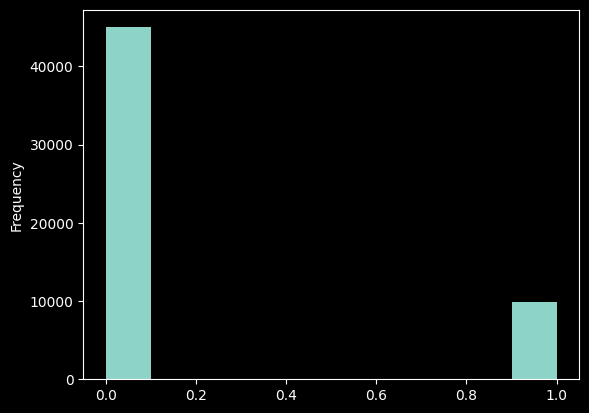

In [17]:
df_train["fraud_bool"].plot.hist()
vc = df_train["fraud_bool"].value_counts() / df_train["fraud_bool"].count()
vc.apply(lambda values: "{:.2%}".format(values))

<Axes: ylabel='Frequency'>

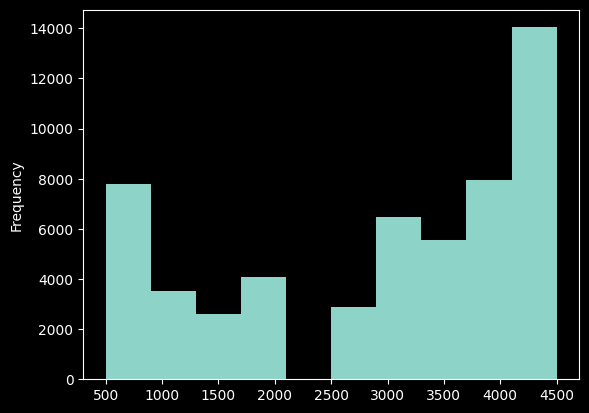

In [18]:
df_train["income"].plot.hist()

In [23]:
def x_y_split(df, X_cols, y_cols):
    return df[X_cols], df[y_cols]

In [32]:
from imblearn.under_sampling import InstanceHardnessThreshold

y_cols = ["fraud_bool"]
X_cols  = df_train.drop(columns=y_cols).columns

X_train, y_train = x_y_split(df_train, X_cols, y_cols)
X_test, y_test = x_y_split(df_test, X_cols, y_cols)

In [33]:
iht = InstanceHardnessThreshold(n_jobs=-1, random_state=42)
X_train, y_train = iht.fit_resample(X_train, y_train)

In [34]:
y_train.value_counts()

fraud_bool
0             11993
1              9938
Name: count, dtype: int64

In [35]:
X_test, y_test = iht.fit_resample(X_test, y_test)

In [37]:
y_test.value_counts()

fraud_bool
0             1128
1             1091
Name: count, dtype: int64

In [38]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

### Outliers e trasformazione features

Procediamo studiando la distribuzione delle feature di tipo `float` ed eventualmente trasformandole, processo che spesso rende più semplice la modellizazione.
Dalle precedenti chiamate di `df_info` possiamo notare che il range di `exch_usd` è [0, 744.306139] mentre per `inflation_annual_cpi` è [-28.502137,66279.892370].
Innanzituto visualizziamo la distribuzione delle due feature:

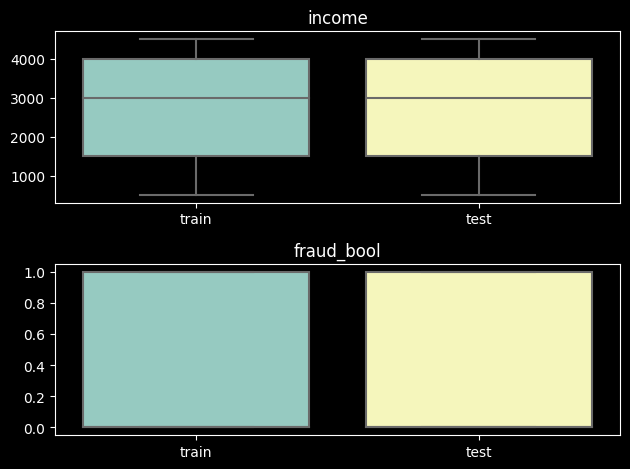

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2)
sns.boxplot([df_train["income"],df_test["income"]], ax=axs[0])
sns.boxplot([df_train["fraud_bool"],df_test["fraud_bool"]], ax=axs[1])
axs[0].title.set_text("income")
axs[1].title.set_text("fraud_bool")
axs[0].set_xticks(ticks=[0,1],labels=["train","test"])
axs[1].set_xticks(ticks=[0,1],labels=["train","test"])
plt.tight_layout()

Mentre `exch_usd` mostra una distribuzione a coda lunga, per `inflation_annual_cpi` è evidente la presenza di un outlier nel train set con valore ~60000. Rimuoviamolo e visualizziamo di nuovo le distribuzioni:

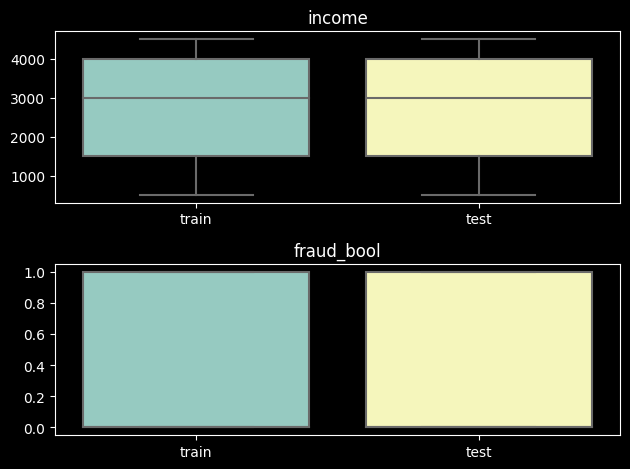

In [42]:
fig, axs = plt.subplots(2)
sns.boxplot([df_train["income"],df_test["income"]], ax=axs[0])
sns.boxplot([df_train["fraud_bool"],df_test["fraud_bool"]], ax=axs[1])
axs[0].title.set_text("income")
axs[1].title.set_text("fraud_bool")
axs[0].set_xticks(ticks=[0,1],labels=["train","test"])
axs[1].set_xticks(ticks=[0,1],labels=["train","test"])
plt.tight_layout()

Sono ancora presenti diversi outlier, ma la distribuzione è migliore. Date le code lunghe, possiamo applicare una trasformazione ai dati per ridurne la curtosi, ad esempio `PowerTransformer`:

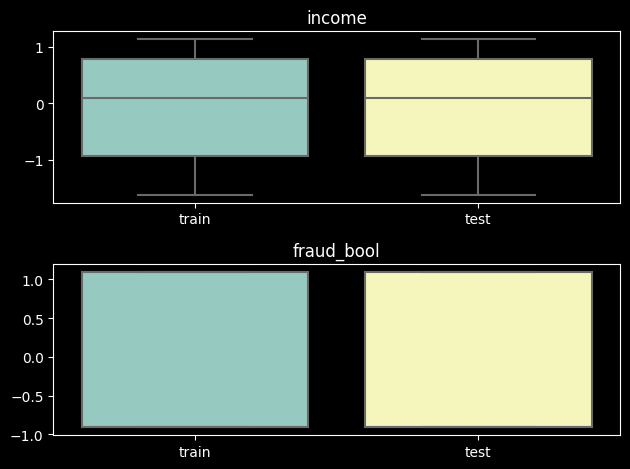

In [43]:
from sklearn.preprocessing import PowerTransformer

float_cols = ["income", "fraud_bool"]
transformer = PowerTransformer()

# Utilizzeremo questa copia successivamente
df_test_copy = df_test.copy(deep=True)

transformer.fit(df_train[float_cols])
df_train[float_cols]=transformer.transform(df_train[float_cols])
df_test[float_cols]=transformer.transform(df_test[float_cols])

fig, axs = plt.subplots(2)
sns.boxplot([df_train["income"],df_test["income"]], ax=axs[0])
sns.boxplot([df_train["fraud_bool"],df_test["fraud_bool"]], ax=axs[1])
axs[0].title.set_text("income")
axs[1].title.set_text("fraud_bool")
axs[0].set_xticks(ticks=[0,1],labels=["train","test"])
axs[1].set_xticks(ticks=[0,1],labels=["train","test"])
plt.tight_layout()

In [44]:
display(get_info(df_train[float_cols]),get_info(df_test[float_cols]))

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
income,float64,10,0,21931.0,0.000000e+00,1.000023,-1.618420,-0.933748,0.098163,0.787899,1.133154
fraud_bool,float64,2,0,21931.0,8.294147e-17,1.000023,-0.910302,-0.910302,-0.910302,1.098536,1.098536


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
income,float64,10,0,2219.0,-0.019620,1.013046,-1.618420,-0.933748,0.098163,0.787899,1.133154
fraud_bool,float64,2,0,2219.0,0.077369,1.004506,-0.910302,-0.910302,-0.910302,1.098536,1.098536


None

None

Abbiamo quindi trasformato le nostre features in una forma più adatta ai passaggi successivi.

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizzazione

minx_max_norm = MinMaxScaler()
minx_max_norm.fit(df_train[["fraud_bool"]])
# Train
df_train["fraud_bool"] = minx_max_norm.transform(df_train[["fraud_bool"]])
# Test
df_test["fraud_bool"] = minx_max_norm.transform(df_test[["fraud_bool"]])

# Standardizzazione

standardizer = StandardScaler()
standardizer.fit(df_train[["income"]])
# Train
df_train["income"] = standardizer.transform(df_train[["income"]])
# Test
df_test["income"] = standardizer.transform(df_test[["income"]])

display(
    get_info(df_train[["income", "fraud_bool"]]),
    get_info(df_test[["income", "fraud_bool"]]),
)

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
income,float64,10,0,21931.0,-2.073537e-17,1.000023,-1.61842,-0.933748,0.098163,0.787899,1.133154
fraud_bool,float64,2,0,21931.0,4.531485e-01,0.497811,0.00000,0.000000,0.000000,1.000000,1.000000


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
income,float64,10,0,2219.0,-0.019620,1.013046,-1.61842,-0.933748,0.098163,0.787899,1.133154
fraud_bool,float64,2,0,2219.0,0.491663,0.500043,0.00000,0.000000,0.000000,1.000000,1.000000


None

None

Infine normalizziamo le restanti feature del nostro dataset.

In [46]:
# Utilizziamo MinMaxScaler, classe di scikit-learn dedicata alla normalizzazione delle feature in un range
min_max_transform = MinMaxScaler()
transformed_columns = ["income", "fraud_bool"]
# Selezioniamo le colonne non ancora trasformate
to_transform_columns = df_train.loc[:,df_train.columns.isin(transformed_columns) == False].columns
display(to_transform_columns)

Index(['customer_age', 'proposed_credit_limit',
       'date_of_birth_distinct_emails_4w', 'name_email_similarity',
       'foreign_request', 'velocity_6h', 'has_other_cards',
       'credit_risk_score', 'intended_balcon_amount', 'keep_alive_session',
       'AA', 'AB', 'AC', 'AD', 'AE'],
      dtype='object')

In [47]:
# Il metodo `fit_transform` combina il fitting e l'applicazione della trasformazione in un solo step
df_train[to_transform_columns] = min_max_transform.fit_transform(df_train[to_transform_columns])

In [48]:
# In questo caso usiamo solo `transform`, in quanto la trasformazione è già fittata sul train set
df_test[to_transform_columns] = min_max_transform.transform(df_test[to_transform_columns])

Queste trasformazioni sono molto utili ma potremmo chiederci come invertirle, ovvero ottenere i dati originali.
Soluzione: ogni classe di `scikit-learn` per trasformazioni invertibili implementa (una volta fittata) un metodo `inverse_transform`.

In [49]:
def inverse_transform_df(df, scaler):
    # Questa funzione applica il metodo `inverse_transform` di un'oggetto scaler ad un dataframe df
    return pd.DataFrame(
        scaler.inverse_transform(df),
        columns=df.columns,
    )

# Applichiamo la trasformazione inversa alle colonne appena trattate
inverted_df = inverse_transform_df(df_test[to_transform_columns], min_max_transform)

# Controlliamo che il risultato corrisponda effettivamente al dataframe originale
np.allclose(inverted_df[to_transform_columns], df_test_copy[to_transform_columns], rtol=1e-05, atol=1e-08, equal_nan=False)

True

## Calcolo delle correlazioni

La correlazione tra caratteristiche (features) e obiettivo (target) sottintende il rapporto lineare tra le variabili indipendenti (o caratteristiche) e la variabile dipendente (o obiettivo). Viene utilizzato per quantificare il grado in cui un cambiamento nelle caratteristiche può influenzare il target. Può essere utile, nel caso di modelli lineari, per selezionare le variabili più promettenti in fase di modellizzazione.

Nel prossimo notebook creeremo modelli di regressione e classificazione per i target `annual_inflation_cpi` e `banking_crisis`, quindi valutiamo la correlazione delle features con questi due possibili target.

In [50]:
bc_corr=(
    df.corr(numeric_only=True)["income"]
    .sort_values()
)
iac_corr=(
    df.corr(numeric_only=True)["fraud_bool"]
    .sort_values()
)
pd.DataFrame({"income_correlation": bc_corr, "fraud_bool_correlation": iac_corr})

,income_correlation,fraud_bool_correlation
AA,0.012215,-0.125009
AB,-0.010151,0.006382
AC,-0.018580,0.113807
AD,0.025856,-0.000479
AE,-0.001505,-0.003134
credit_risk_score,0.201262,0.245569
customer_age,0.140715,0.221858
date_of_birth_distinct_emails_4w,-0.076698,-0.157505
foreign_request,0.023420,0.060103
fraud_bool,0.165261,1.000000


# Export dei dataset

Ora che i nostri dati sono pronti per la modellizzazione esportiamoli in due `csv` distinti, pronti per i prossimi passaggi:

In [51]:
df_train.to_csv("../Day3-MachineLearning/datasets/train.csv", index=False)
df_test.to_csv("../Day3-MachineLearning/datasets/test.csv", index=False)